In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_excel("DIESEL.xlsx")
print("Dataset:\n")
print(df)



Dataset:

   Month  Load(MW) Class
0      4        40    no
1      6        50    no
2      7        80    no
3     10       100    no
4     12       120    no
5     16       140    no
6     20       300   yes
7     22       340   yes
8     24       380   yes


In [3]:
df['Class'] = df['Class'].map({'no': 0, 'yes': 1})

print("\nAfter Mapping:\n")
print(df)



After Mapping:

   Month  Load(MW)  Class
0      4        40      0
1      6        50      0
2      7        80      0
3     10       100      0
4     12       120      0
5     16       140      0
6     20       300      1
7     22       340      1
8     24       380      1


In [8]:
X = df[['Month', 'Load(MW)']]
y = df['Class']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=3, random_state=0)
clf.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",3
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric(y_

In [9]:
y_pred = clf.predict(X_test)

print("\nPredicted Values:")
print(y_pred)


Predicted Values:
[1 0 0]


In [10]:
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix

print("\nAccuracy Score:", accuracy_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))



Accuracy Score: 1.0
Mean Squared Error: 0.0


In [11]:
cm = confusion_matrix(y_test, y_pred)

print("\nConfusion Matrix:\n")
print(cm)



Confusion Matrix:

[[2 0]
 [0 1]]


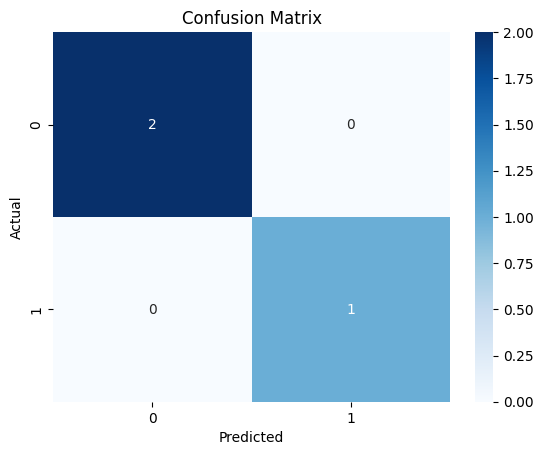

In [12]:
plt.figure()
sns.heatmap(cm, annot=True, cmap="Blues", fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [14]:
new_month = 20
new_load = 120

new_data = pd.DataFrame({
    'Month': [new_month],
    'Load(MW)': [new_load]
})

new_prediction = clf.predict(new_data)

print("New Prediction (0 = No, 1 = Yes):", new_prediction[0])

if new_prediction[0] == 1:
    print("Standby Diesel Generator: SWITCH ON")
else:
    print("Standby Diesel Generator: DO NOT SWITCH ON")


New Prediction (0 = No, 1 = Yes): 0
Standby Diesel Generator: DO NOT SWITCH ON
